In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

data_dir='C:\\Users\\visha\\TEA\\teasickness'
img_height, img_width = 224, 224
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')


val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


base_model = InceptionV3(weights='imagenet', include_top=False,               
          input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, epochs=50, validation_data=val_data)


loss, accuracy = model.evaluate(val_data)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')


Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 111, 111, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activatio

 conv2d_292 (Conv2D)         (None, 25, 25, 96)           82944     ['activation_291[0][0]']      
                                                                                                  
 conv2d_293 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_27[0][0]']
                                                                                                  
 batch_normalization_287 (B  (None, 25, 25, 64)           192       ['conv2d_287[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_289 (B  (None, 25, 25, 64)           192       ['conv2d_289[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_nor

 activation_296 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_296[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_299 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_299[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_300 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_300[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_294[0][0]',      
          

 activation_309 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_309[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_310 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_309[0][0]']      
                                                                                                  
 batch_normalization_310 (B  (None, 25, 25, 96)           288       ['conv2d_310[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_310 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_310[0][0
 )                                                                  ]']                           
          

 agePooling2D)                                                                                    
                                                                                                  
 conv2d_312 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_315 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_314[0][0]']      
                                                                                                  
 conv2d_320 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_319[0][0]']      
                                                                                                  
 conv2d_321 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_30[0][0]']
                                                                                                  
 batch_nor

                                                                                                  
 activation_329 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_329[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_31 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_322 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_325 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_324[0][0]']      
          

 batch_normalization_339 (B  (None, 12, 12, 160)          480       ['conv2d_339[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_334 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_334[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_339 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_339[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_32 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePoolin

 conv2d_349 (Conv2D)         (None, 12, 12, 192)          258048    ['activation_348[0][0]']      
                                                                                                  
 batch_normalization_344 (B  (None, 12, 12, 192)          576       ['conv2d_344[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_349 (B  (None, 12, 12, 192)          576       ['conv2d_349[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_344 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_344[0][0
 )                                                                  ]']                           
          

 activation_356 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_356[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_353 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_352[0][0]']      
                                                                                                  
 conv2d_357 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_356[0][0]']      
                                                                                                  
 batch_normalization_353 (B  (None, 5, 5, 320)            960       ['conv2d_353[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_nor

 activation_361 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_361[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_364 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_364[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_365 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_365[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_366 (B  (None, 5, 5, 192)            576       ['conv2d_366[0][0]']          
 atchNorma

 activation_369 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_369[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_370 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_370[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_373 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_373[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_374 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_374[0][0
 )        

Epoch 29/50
23/23 [==============================] - 181s 8s/step - loss: 0.3708 - accuracy: 0.8664 - val_loss: 1.0185 - val_accuracy: 0.7011
Epoch 30/50
23/23 [==============================] - 185s 8s/step - loss: 0.3811 - accuracy: 0.8678 - val_loss: 0.8651 - val_accuracy: 0.6609
Epoch 31/50
23/23 [==============================] - 186s 8s/step - loss: 0.3179 - accuracy: 0.8917 - val_loss: 1.1095 - val_accuracy: 0.6207
Epoch 32/50
23/23 [==============================] - 192s 8s/step - loss: 0.4069 - accuracy: 0.8284 - val_loss: 0.8868 - val_accuracy: 0.6782
Epoch 33/50
23/23 [==============================] - 254s 11s/step - loss: 0.4128 - accuracy: 0.8453 - val_loss: 1.0459 - val_accuracy: 0.6322
Epoch 34/50
23/23 [==============================] - 187s 8s/step - loss: 0.3347 - accuracy: 0.8790 - val_loss: 1.0430 - val_accuracy: 0.6552
Epoch 35/50
23/23 [==============================] - 189s 8s/step - loss: 0.2980 - accuracy: 0.8903 - val_loss: 0.9047 - val_accuracy: 0.6494
Epoch

In [15]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3


base_model = InceptionV3(weights='imagenet', include_top=False,               
          input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_376 (Conv2D)         (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, 111, 111, 32)         96        ['conv2d_376[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, 111, 111, 32)         0         ['batch_normalization_37

                                                                                                  
 conv2d_387 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_36[0][0]']
                                                                                                  
 batch_normalization_381 (B  (None, 25, 25, 64)           192       ['conv2d_381[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_383 (B  (None, 25, 25, 64)           192       ['conv2d_383[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_386 (B  (None, 25, 25, 96)           288       ['conv2d_386[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_393 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_393[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_394 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_394[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_388[0][0]',      
                                                                     'activation_390[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_404 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_403[0][0]']      
                                                                                                  
 batch_normalization_404 (B  (None, 25, 25, 96)           288       ['conv2d_404[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_404 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_404[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_40

                                                                                                  
 conv2d_406 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_409 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_408[0][0]']      
                                                                                                  
 conv2d_414 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_413[0][0]']      
                                                                                                  
 conv2d_415 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_39[0][0]']
                                                                                                  
 batch_normalization_406 (B  (None, 12, 12, 192)          576       ['conv2d_406[0][0]']          
 atchNorma

 activation_423 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_423[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_40 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_416 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_419 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_418[0][0]']      
                                                                                                  
 conv2d_42

 atchNormalization)                                                                               
                                                                                                  
 activation_428 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_428[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_433 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_433[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_41 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_438 (B  (None, 12, 12, 192)          576       ['conv2d_438[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_443 (B  (None, 12, 12, 192)          576       ['conv2d_443[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_438 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_438[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_447 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_446[0][0]']      
                                                                                                  
 conv2d_451 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_450[0][0]']      
                                                                                                  
 batch_normalization_447 (B  (None, 5, 5, 320)            960       ['conv2d_447[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_451 (B  (None, 5, 5, 192)            576       ['conv2d_451[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_458 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_458[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_459 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_459[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_460 (B  (None, 5, 5, 192)            576       ['conv2d_460[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_464 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_464[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_467 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_467[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_468 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_468[0][0
 )                                                                  ]']                           
          

In [16]:
import matplotlib.pyplot as plt

def plot_loss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()

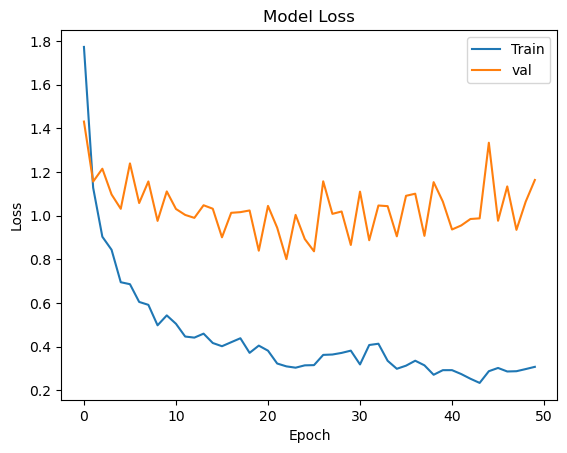

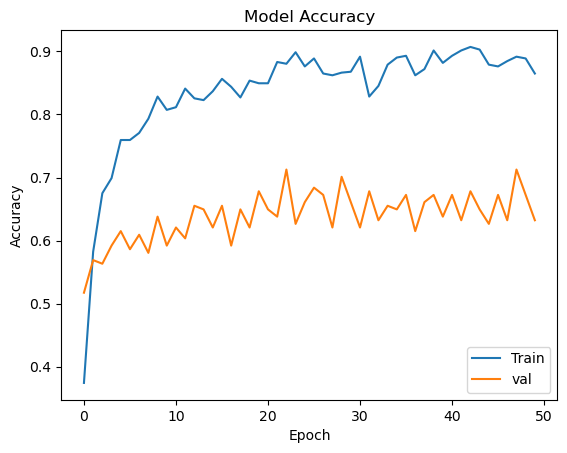

In [17]:
plot_loss(history)
plot_accuracy(history)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

loss, accuracy = model.evaluate(test_data)


print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 129s 7s/step - loss: 2.4320 - accuracy: 0.1402
Test Loss: 2.432039737701416
Test Accuracy: 0.1401515156030655


In [20]:
import numpy as np

In [21]:

true_labels = test_data.classes

predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 127s 7s/step


1/1 [==============================] - 9s 9s/step


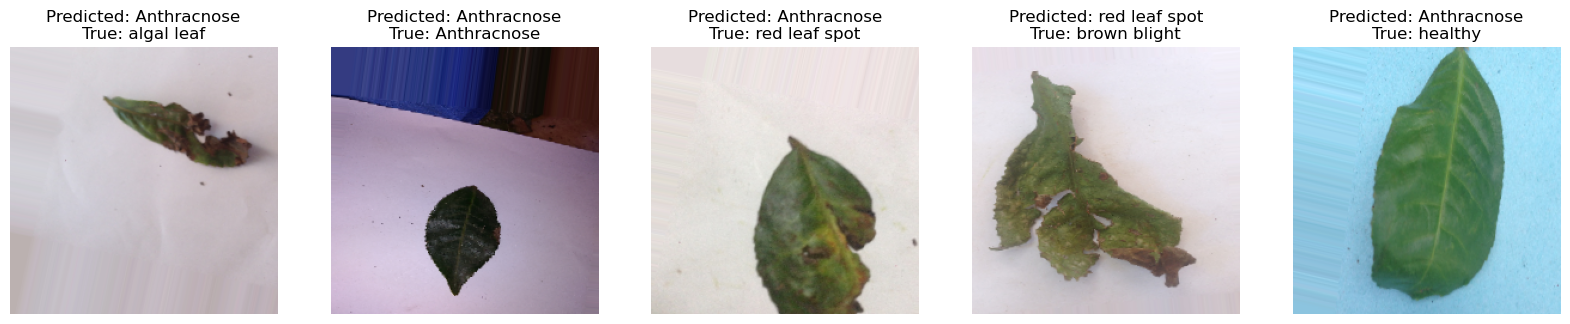

In [22]:
import matplotlib.pyplot as plt

num_images = 5
test_images, test_labels = next(test_data)


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]


fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


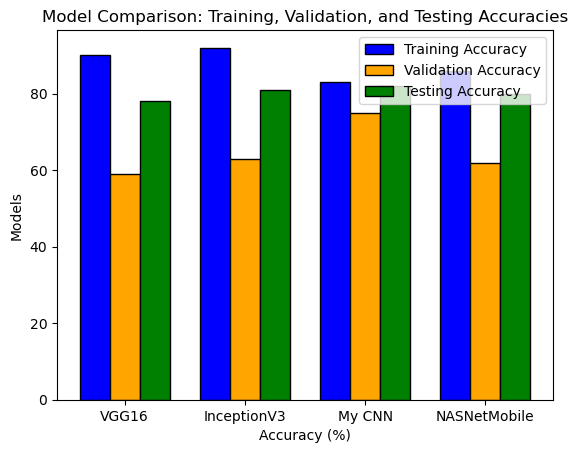

In [23]:
import matplotlib.pyplot as plt

model_names = ['VGG16', 'InceptionV3', 'My CNN', 'NASNetMobile']
train_accuracy = [90, 92, 83, 86]
val_accuracy = [59, 63, 75, 62]
test_accuracy = [78, 81, 82, 80]


bar_width = 0.25


r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, train_accuracy, color='blue', width=bar_width, edgecolor='black', label='Training Accuracy')
plt.bar(r2, val_accuracy, color='orange', width=bar_width, edgecolor='black', label='Validation Accuracy')
plt.bar(r3, test_accuracy, color='green', width=bar_width, edgecolor='black', label='Testing Accuracy')


plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
plt.title('Model Comparison: Training, Validation, and Testing Accuracies')


plt.xticks([r + bar_width for r in range(len(model_names))], model_names)


plt.legend()
plt.show()


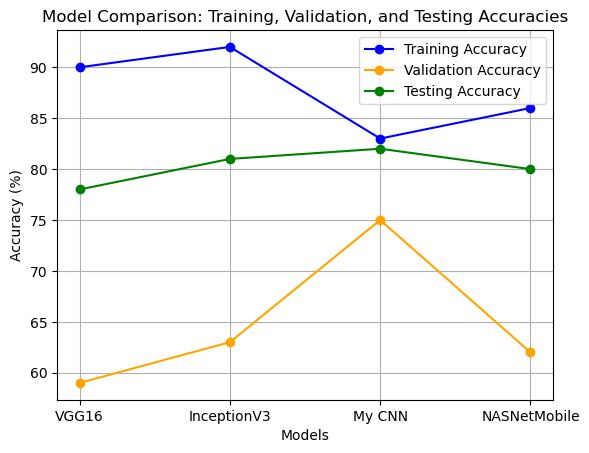

In [24]:
import matplotlib.pyplot as plt


model_names = ['VGG16', 'InceptionV3', 'My CNN', 'NASNetMobile']
train_accuracy = [90, 92, 83, 86]
val_accuracy = [59, 63, 75, 62]
test_accuracy = [78, 81, 82, 80]


plt.plot(model_names, train_accuracy, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(model_names, val_accuracy, marker='o', linestyle='-', color='orange', label='Validation Accuracy')
plt.plot(model_names, test_accuracy, marker='o', linestyle='-', color='green', label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Training, Validation, and Testing Accuracies')

plt.legend()
plt.grid(True)
plt.show()


In [25]:

true_labels = test_data.classes

predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

17/17 [==============================] - 125s 7s/step


In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# 
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.11      0.47      0.17        60
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        67
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        44
           6       0.18      0.53      0.26        85
           7       0.00      0.00      0.00        85

    accuracy                           0.14       528
   macro avg       0.04      0.12      0.05       528
weighted avg       0.04      0.14      0.06       528



C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("C:\\Users\\visha")